This is the notebook that provides some examples for reference.

In [10]:
# import packages necessary
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [22]:
# load file to dataframe
df = pd.read_csv('2021 Olympics/Coaches.csv', skiprows = 2)
df

,ABDELMAGID Wael,Egypt,Football,Unnamed: 3
0,ABE Junya,Japan,Volleyball,NaN
1,ABE Katsuhiko,Japan,Basketball,NaN
2,ADAMA Cherif,Côte d'Ivoire,Football,NaN
3,AGEBA Yuya,Japan,Volleyball,NaN
4,AIKMAN Siegfried Gottlieb,Japan,Hockey,Men
...,...,...,...,...
388,ZAMORA PEDREIRA Javier,Spain,Basketball,NaN
389,ZAMPIERI Francesca,Liechtenstein,Artistic Swimming,Duet
390,ZHANG Xiaohuan,People's Republic of China,Artistic Swimming,NaN
391,ZIJP Simon,Netherlands,Hockey,NaN


<AxesSubplot:>

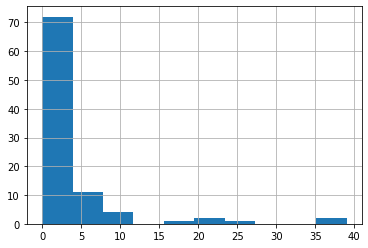

In [3]:
# plot the distribution of the number of Gold medals
df['Gold'].hist() # refer to the API documentation if you work on the distribution of continuous variables

number of observations [72 11  4  0  1  2  1  0  0  2]
bins [ 0.   3.9  7.8 11.7 15.6 19.5 23.4 27.3 31.2 35.1 39. ]


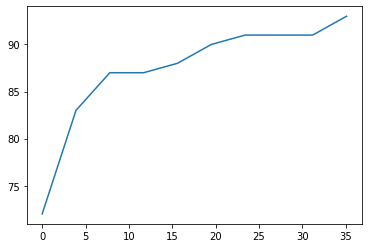

In [8]:
values, bins = np.histogram(df['Gold'], bins=10)
print('number of observations', values)
print('bins', bins)
cumulative = np.cumsum(values)
plt.plot(bins[:-1], cumulative) # bins[:-1] contains the first to the one but last element

In [24]:
# impute geometric mean of [3,4,5]
a = np.array([3,4,5])
a.prod()**(1.0/len(a))

3.9148676411688634

In [27]:
a.prod()**(1/len(a))

3.9148676411688634

In [13]:
# find countries with 10 or more gold medals
se_country = df.loc[df['Gold'] >= 10, 'Team/NOC']
se_country

0      United States of America
1    People's Republic of China
2                         Japan
3                 Great Britain
4                           ROC
5                     Australia
6                   Netherlands
7                        France
8                       Germany
9                         Italy
Name: Team/NOC, dtype: object

In [15]:
# get number of silver medals in countries with 10 or more gold medals
num_silver = df.loc[df['Team/NOC'].isin(se_country), 'Silver']
num_silver

0    41
1    32
2    14
3    21
4    28
5     7
6    12
7    12
8    11
9    10
Name: Silver, dtype: int64

In [16]:
num_silver.mean()

18.8

In [18]:
# percent of gold medals in each country
df['pct_gold'] = df['Gold'] / df['Total']
df

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,pct_gold
0,1,United States of America,39,41,33,113,1,0.345133
1,2,People's Republic of China,38,32,18,88,2,0.431818
2,3,Japan,27,14,17,58,5,0.465517
3,4,Great Britain,22,21,22,65,4,0.338462
4,5,ROC,20,28,23,71,3,0.281690
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,0.000000
89,86,Grenada,0,0,1,1,77,0.000000
90,86,Kuwait,0,0,1,1,77,0.000000
91,86,Republic of Moldova,0,0,1,1,77,0.000000


<AxesSubplot:>

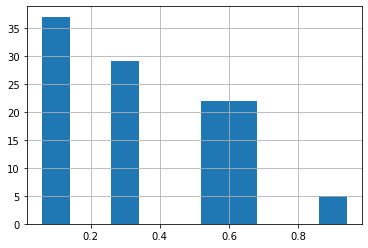

In [23]:
df['pct_gold'].hist(bins = [0,0.2,0.4,0.8, 1], rwidth = 0.4)

In [37]:
# get random sequences
rand_idx = np.random.choice(50, size=20)
rand_idx

array([31, 16, 34, 43, 18,  0,  5, 20,  1, 37,  1,  3, 42, 25, 39, 41, 31,
       11, 23,  2])

In [38]:
# sample from the dataframe
df_sample = df.iloc[rand_idx]
df_sample.head(3)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,pct_gold
31,32,Uzbekistan,3,0,2,5,42,0.600000
16,17,Poland,4,5,5,14,19,0.285714
34,35,Turkey,2,2,9,13,20,0.153846


In [39]:
# impute sample variance
df_sample['Total'].var(ddof=1)

1181.905263157895

In [2]:
df = pd.read_csv('AZ_2013_ACS5.csv')
df

,GEO_ID,pop_tot,house_vacant,house_occupied,house_tot,hh_tot,hh_fm,hh_fm_2,hh_fm_3,hh_fm_4,...,wkr_cmt_car,wkr_cmt_da,wkr_cmt_cpl,wkr_cmt_transit,wkr_cmt_cab,wkr_cmt_motor,wkr_cmt_bicycle,wkr_cmt_walk,wkr_cmt_other,wkr_home
0,1500000US040019426001,740,188,167,355,167,144,70,20,17,...,100,78,22,7,0,0,0,0,0,5
1,1500000US040019426002,778,156,195,351,195,156,54,23,39,...,72,57,15,18,0,0,0,12,1,9
2,1500000US040019427001,911,231,249,480,249,178,73,27,38,...,193,179,14,0,0,0,0,4,0,5
3,1500000US040019427002,1864,369,441,810,441,321,70,79,76,...,350,303,47,0,0,0,6,79,5,14
4,1500000US040019427003,999,272,224,496,224,168,53,33,21,...,168,115,53,0,0,0,0,2,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,1500000US040270121002,761,157,226,383,226,184,63,19,21,...,143,132,11,0,0,0,0,49,11,53
4174,1500000US040279800031,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4175,1500000US040279800041,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4176,1500000US040279800051,816,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df['ID'] = df['GEO_ID'].str.split('US', expand = True)[1]
df

,GEO_ID,pop_tot,house_vacant,house_occupied,house_tot,hh_tot,hh_fm,hh_fm_2,hh_fm_3,hh_fm_4,...,wkr_cmt_da,wkr_cmt_cpl,wkr_cmt_transit,wkr_cmt_cab,wkr_cmt_motor,wkr_cmt_bicycle,wkr_cmt_walk,wkr_cmt_other,wkr_home,ID
0,1500000US040019426001,740,188,167,355,167,144,70,20,17,...,78,22,7,0,0,0,0,0,5,040019426001
1,1500000US040019426002,778,156,195,351,195,156,54,23,39,...,57,15,18,0,0,0,12,1,9,040019426002
2,1500000US040019427001,911,231,249,480,249,178,73,27,38,...,179,14,0,0,0,0,4,0,5,040019427001
3,1500000US040019427002,1864,369,441,810,441,321,70,79,76,...,303,47,0,0,0,6,79,5,14,040019427002
4,1500000US040019427003,999,272,224,496,224,168,53,33,21,...,115,53,0,0,0,0,2,9,13,040019427003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,1500000US040270121002,761,157,226,383,226,184,63,19,21,...,132,11,0,0,0,0,49,11,53,040270121002
4174,1500000US040279800031,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,040279800031
4175,1500000US040279800041,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,040279800041
4176,1500000US040279800051,816,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,040279800051


In [5]:
df['ID'] = df['ID'].astype(int)
df

,GEO_ID,pop_tot,house_vacant,house_occupied,house_tot,hh_tot,hh_fm,hh_fm_2,hh_fm_3,hh_fm_4,...,wkr_cmt_da,wkr_cmt_cpl,wkr_cmt_transit,wkr_cmt_cab,wkr_cmt_motor,wkr_cmt_bicycle,wkr_cmt_walk,wkr_cmt_other,wkr_home,ID
0,1500000US040019426001,740,188,167,355,167,144,70,20,17,...,78,22,7,0,0,0,0,0,5,40019426001
1,1500000US040019426002,778,156,195,351,195,156,54,23,39,...,57,15,18,0,0,0,12,1,9,40019426002
2,1500000US040019427001,911,231,249,480,249,178,73,27,38,...,179,14,0,0,0,0,4,0,5,40019427001
3,1500000US040019427002,1864,369,441,810,441,321,70,79,76,...,303,47,0,0,0,6,79,5,14,40019427002
4,1500000US040019427003,999,272,224,496,224,168,53,33,21,...,115,53,0,0,0,0,2,9,13,40019427003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,1500000US040270121002,761,157,226,383,226,184,63,19,21,...,132,11,0,0,0,0,49,11,53,40270121002
4174,1500000US040279800031,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40279800031
4175,1500000US040279800041,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40279800041
4176,1500000US040279800051,816,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40279800051
